# Test 1
  Below is an example of using MKSHomogenizationModel to predict (or
    classify) the type of microstructure using PCA and Logistic Regression.

In [2]:
import ipdb


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
from  pymks.mks_homogenization_model import MKSHomogenizationModel
n_states = 3
domain = [-1, 1]

from pymks.bases import LegendreBasis
leg_basis = LegendreBasis(n_states=n_states, domain=domain)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
reducer = PCA(n_components=3)
linker = LogisticRegression()
model = MKSHomogenizationModel(basis=leg_basis, dimension_reducer=reducer, property_linker=linker)
from pymks.datasets import make_cahn_hilliard
X0, X1 = make_cahn_hilliard(n_samples=50)
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])

X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))

model.fit(X, y)

X0_test, X1_test = make_cahn_hilliard(n_samples=3)
y0_test = model.predict(X0_test)
y1_test = model.predict(X1_test)
assert np.allclose(y0_test, [0, 0, 0])
assert np.allclose(y1_test, [1, 1, 1])
# Basically what this does is it classifies the initial state of the  cahn hillard with the final state so ot gives 0 for the inital state and gives 1 for the final state


hello


This is the FMKS version of the test1

In [4]:
# FMKS version
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from dask.multiprocessing import get
import dask.array as da

import numpy as np
n_states = 3
domain = [-1, 1]

from pymks.bases import LegendreBasis
from pymks.fmks.data.cahn_hilliard import generate, solve
leg_basis = LegendreBasis(n_states=n_states, domain=domain)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
reducer = PCA(n_components=3)
linker = LogisticRegression()




In [5]:
da.random.seed(99)

data = generate(shape=(100, 41, 41), chunks=(40, 41, 41), delta_t=1e-2)

In [6]:
X0,X1= data
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])

In [7]:
X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X[20])
plt.show

<function matplotlib.pyplot.show>

In [9]:
# My own Primitiva bases
# replaces Primitive transform nstate 2 min -1 max 1

def Primitivebin(X):
    
    X[X>0]=0
    X[X<0]=1
    return X





In [10]:
X.shape


(200, 41, 41)

In [11]:
from pymks.fmks.correlations import auto_correlation

In [12]:

chunks=X.shape
Xa= da.from_array(X, chunks=chunks)
Stats=auto_correlation(Xa)

In [13]:
FlattenStats=da.Array.flatten(Stats).reshape(200,(41*41))
pca = PCA(n_components=3)
pca.fit(FlattenStats)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
Scores=pca.transform(FlattenStats)


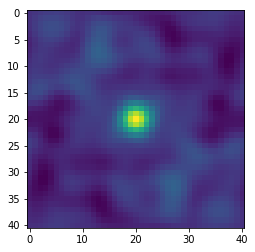

In [15]:
plt.imshow(Stats[100])
plt.show()

In [16]:

lf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(Scores, y)



In [17]:
## Create the test set 

datatest = generate(shape=(3, 41, 41), chunks=(1, 41, 41), delta_t=1e-2)

X0_test,X1_test= datatest


X0_test=Primitivebin(X0_test)
X1_test=Primitivebin(X1_test)


In [18]:
chunks1=X0_test.shape
X1= da.from_array(X0_test, chunks=chunks1)
testStats1=auto_correlation(X1)
FlattenStats1=da.Array.flatten(testStats1).reshape(3,(41*41))
chunks2=X1_test.shape
X2= da.from_array(X1_test, chunks=chunks2)
testStats2=auto_correlation(X2)
FlattenStats2=da.Array.flatten(testStats2).reshape(3,(41*41))



test1_pc=pca.transform(FlattenStats1)
test2_pc=pca.transform(FlattenStats2)




y0_test = lf.predict(test1_pc)
y1_test = lf.predict(test2_pc)
assert np.allclose(y0_test, [0, 0, 0])
assert np.allclose(y1_test, [1, 1, 1])




In [19]:
test1_pc.shape


(3, 3)

In [16]:
from pymks.fmks.bases.legendre import discretize,LegendreTransformer

In [17]:
from pymks.fmks.bases.primitive import PrimitiveTransformer, redundancy,discretize
from pymks.fmks.localization import LocalizationRegressor, flatten, ReshapeTransformer, coeff_to_real
from pymks.fmks.func import iterate_times

In [18]:
'''
model = Pipeline(steps=[
    ('reduce', reducer),
    ('discretize', LegendreTransformer(n_state=5, min_=-1.0, max_=1.0)),
    ('regressor', linker)
])  
'''


"\nmodel = Pipeline(steps=[\n    ('reduce', reducer),\n    ('discretize', LegendreTransformer(n_state=5, min_=-1.0, max_=1.0)),\n    ('regressor', linker)\n])  \n"

In [19]:
np.max(X[1])

1.0

In [20]:
 A=discretize(X,n_state=3, min_=-1.0, max_=1.0)

In [21]:
A.shape

(200, 41, 41, 3)

In [22]:
print(A[1,:,:,1])

dask.array<getitem, shape=(41, 41), dtype=float64, chunksize=(41, 41)>


# B


In [23]:
from pymks.datasets import make_cahn_hilliard
from pymks.fmks.correlations import correlations
X0, X1 = make_cahn_hilliard(n_samples=50)
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])


X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))

model2=Pipeline(steps=[
    ('reducer',reducer)
])




ImportError: cannot import name 'correlations'

# Test 2.a
Let's first start with using the microstructure and effective
properties.


In [24]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from pymks.bases import PrimitiveBasis
from pymks.stats import correlate

reducer = PCA(n_components=2)
linker = LinearRegression()
prim_basis = PrimitiveBasis(n_states=2, domain=[0, 1])
correlations = [(0, 0), (1, 1), (0, 1)]
model = MKSHomogenizationModel(prim_basis,dimension_reducer=reducer,property_linker=linker,correlations=correlations)
np.random.seed(99)
X = np.random.randint(2, size=(3, 15))
y = np.array([1, 2, 3])
model.fit(X, y)
X_stats = correlate(X, prim_basis)
X_reshaped = X_stats.reshape((X_stats.shape[0], -1))
X_pca = reducer.fit_transform(X_reshaped - np.mean(X_reshaped, axis=1)[:, None])
assert np.allclose(model.reduced_fit_data, X_pca)


hello


# Test 2.b
Now let's use the same method with spatial correlations instead of microtructures.

In [29]:
        >>> from sklearn.decomposition import PCA
        >>> from sklearn.linear_model import LinearRegression
        >>> from pymks.bases import PrimitiveBasis
        >>> from pymks.stats import correlate

        >>> reducer = PCA(n_components=2)
        >>> linker = LinearRegression()
        >>> prim_basis = PrimitiveBasis(n_states=2, domain=[0, 1])
        >>> correlations = [(0, 0), (1, 1), (0, 1)]
        >>> model = MKSHomogenizationModel(dimension_reducer=reducer,
        ...                                property_linker=linker,
        ...                                compute_correlations=False)
        >>> np.random.seed(99)
        >>> X = np.random.randint(2, size=(3, 15))
        >>> y = np.array([1, 2, 3])
        >>> X_stats = correlate(X, prim_basis, correlations=correlations)
        >>> model.fit(X_stats, y)
        >>> X_reshaped = X_stats.reshape((X_stats.shape[0], X_stats[0].size))
        >>> X_pca = reducer.fit_transform(X_reshaped - np.mean(X_reshaped,
        ...                               axis=1)[:, None])
        >>> assert np.allclose(model.reduced_fit_data, X_pca)


# Test 3a

Returns:
 The predicted macroscopic property for `X`.


In [33]:
        >>> import numpy as np
        >>> from sklearn.manifold import LocallyLinearEmbedding
        >>> from sklearn.linear_model import BayesianRidge
        >>> from pymks.bases import PrimitiveBasis
        >>> np.random.seed(1)
        >>> X = np.random.randint(2, size=(50, 100))
        >>> y = np.random.random(50)
        >>> reducer = LocallyLinearEmbedding()
        >>> linker = BayesianRidge()
        >>> prim_basis = PrimitiveBasis(2, domain=[0, 1])
        >>> model = MKSHomogenizationModel(prim_basis, n_components=2,
        ...                                dimension_reducer=reducer,
        ...                                property_linker=linker)
        >>> model.fit(X, y)
        >>> X_test = np.random.randint(2, size=(1, 100))
        >>> y_pred = model.predict(X_test)

# Test 3b
        Predict with spatial correlations


In [34]:
        >>> from pymks.stats import correlate
        >>> model.compute_correlations = False
        >>> X_corr = correlate(X, prim_basis, correlations=[(0, 0)])
        >>> model.fit(X_corr, y)
        >>> X_corr_test = correlate(X_test, prim_basis,
        ...                         correlations=[(0, 0)])
        >>> y_pred_stats = model.predict(X_corr_test)
        >>> assert np.allclose(y_pred_stats, y_pred, atol=1e-3)
